# Spoken language detection

## 1. 

In [47]:
import os
import random
import numpy as np
import tensorflow as tf
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import IPython

In [48]:
PL_LANG_FILE = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips', 'common_voice_pl_20547814.wav')
PL_LANG_FILE

'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_20547814.wav'

In [49]:

file_content = tf.io.read_file(PL_LANG_FILE) # Load encoded wav file
type(file_content)
   

tensorflow.python.framework.ops.EagerTensor

In [50]:
wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)

In [51]:
wav

<tf.Tensor: shape=(240768, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [52]:
sample_rate.numpy() # 48 kHz próbkowanie należy zmienic

48000

In [53]:
wav = tf.squeeze(wav, axis=-1) # axis=-1 żeby usunąć ostatni wymiar który jest równy 1

In [54]:
wav

<tf.Tensor: shape=(240768,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

In [55]:
wav = librosa.resample(wav.numpy(), orig_sr=sample_rate.numpy(), target_sr=16_000)

In [56]:
wav = tf.convert_to_tensor(wav, dtype=tf.float32)

In [57]:
wav_example = wav
wav_example

<tf.Tensor: shape=(80256,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

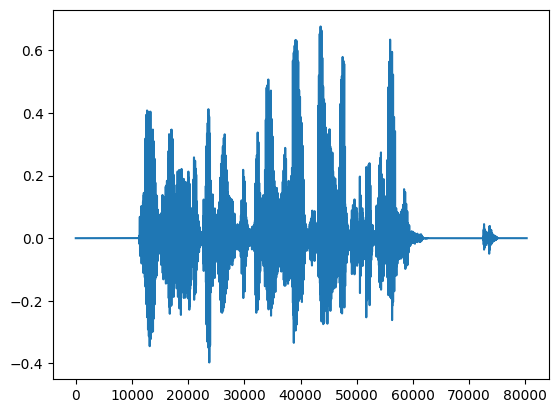

In [58]:
plt.plot(wav)

In [59]:
IPython.display.Audio(PL_LANG_FILE)

### 2. Create Dataset

In [60]:
PL_DIR = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips')
PL_DIR

'languages_audio\\languages_audio_wav\\pl\\clips'

In [61]:
# create tensorflow dataset
pl_dataset = tf.data.Dataset.list_files(PL_DIR + '\*.wav')
pl_dataset

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [62]:
pl_dataset.as_numpy_iterator().next()

b'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_20760857.wav'

In [63]:
pl_dataset.as_numpy_iterator().next()

b'languages_audio\\languages_audio_wav\\pl\\clips\\common_voice_pl_20628623.wav'

In [64]:
df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t')
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_24876\1487738958.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t')


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d...,common_voice_pl_24005493.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
1,039674fdf440f2c9e53ff991cf27230071a2d969342dfd...,common_voice_pl_20605240.mp3,52f0b3164e79636bfc13b1cebe4c5665bb215bcf26095e...,Gdzież tu powód do wyrzutów?,NaN,5,0,NaN,NaN,NaN,NaN,pl,NaN
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.mp3,5dd9590867924455c0b3cf4509c805d881a803371b385d...,Lubię go.,NaN,4,1,thirties,male_masculine,NaN,NaN,pl,NaN
3,068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2...,common_voice_pl_20633386.mp3,cc4d58bd50a90820cd2a7fe8ee771e35af924c61a56621...,— To mi nie pomaga.,NaN,3,1,NaN,NaN,NaN,NaN,pl,NaN
4,0935b1713f2c7947adace84ce007d74bf879f358e5c88d...,common_voice_pl_24105374.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.mp3,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,Porwała go i pobiegła do komory.,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.mp3,e355f502043dd8de0924144ad636a70466b17c01f7f897...,W drzwiach stał młody krępy górnik o szerokich...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.mp3,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,"Naprawdę, nie wiedziałem, czy mam się cieszyć,...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.mp3,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,"Ściany były tak grube, że od sąsiedniego pokoj...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN


In [65]:
df[df['gender'] == 'female_feminine']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
24,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
158,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.mp3,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,Mnie to interesuje.,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
311,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.mp3,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,Brakuje nam czasu,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
312,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.mp3,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,"Nie ma wątpliwości, że klimat się zmienia",NaN,2,1,twenties,female_feminine,NaN,NaN,pl,NaN
691,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.mp3,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,Zmiana wspólnej polityki rolnej,NaN,2,0,seventies,female_feminine,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115900,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.mp3,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,uchylanie się od opodatkowania,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115901,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.mp3,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,"Uważam również, że debata ta pokazała, jak wie...",NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115902,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.mp3,093caf621077839d205578607762a57b48773fac57ee84...,I popełnia się ją pod obłudną przykrywką rzeko...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN
115903,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587813.mp3,09a6ab44f2bcd21e58ba65e1d9051f75fd6fb24d0cf384...,Wydaje się to technicznie możliwe i zostało ju...,NaN,2,0,twenties,female_feminine,NaN,NaN,pl,NaN


In [66]:
df[df['gender'] == 'male_masculine']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.mp3,5dd9590867924455c0b3cf4509c805d881a803371b385d...,Lubię go.,NaN,4,1,thirties,male_masculine,NaN,NaN,pl,NaN
22,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
37,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,male_masculine,NaN,NaN,pl,NaN
49,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.mp3,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,Ostatnie słowa wymówił syczącym szeptem i ze z...,NaN,2,0,twenties,male_masculine,NaN,NaN,pl,NaN
52,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.mp3,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,"Ona, która go zrozumiała zbyt wąsko: — Ooo, tak.",NaN,7,0,thirties,male_masculine,NaN,NaN,pl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.mp3,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,Porwała go i pobiegła do komory.,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.mp3,e355f502043dd8de0924144ad636a70466b17c01f7f897...,W drzwiach stał młody krępy górnik o szerokich...,NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.mp3,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,"Naprawdę, nie wiedziałem, czy mam się cieszyć,...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.mp3,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,"Ściany były tak grube, że od sąsiedniego pokoj...",NaN,2,0,thirties,male_masculine,NaN,NaN,pl,NaN


In [67]:
df.groupby('sentence_id').count()

,client_id,path,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
sentence_id,,,,,,,,,,,,
000010547254f2aa77c475053f8b6b4c83d434f9bc6b39febb275b766c0e4cb7,1,1,1,0,1,1,1,1,1,0,1,0
00007f59e910334724585497c5f56c66445dad9a96bad62108918f507c46d70a,1,1,1,0,1,1,1,1,0,0,1,0
0000a42a2e6b7578771b68c98e11c74b5b086a2ac027592edfeb99e97c6dbf79,1,1,1,0,1,1,1,1,0,0,1,0
00025f331e89b18ae83e113ca0b1809e73ebb3835b9d7bebdd9db4e8f0a35a83,1,1,1,0,1,1,1,1,0,0,1,0
00026e9700c3b59e381a73ca0363782efe5016b2375c5693af2e40f80face7fb,1,1,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ffecbc28db5bb94420e0417acfd68a3eeaa44c473e0e55ebb626c3ab3df4bb23,3,3,3,0,3,3,3,3,0,0,3,0
ffef45483b2128ee9ddde50f72279d72bd4122b51298735fa6c8ec060356abfd,2,2,2,0,2,2,2,2,0,0,2,0
fff04179750ea84cc1838064e42ab2b595479bec71425ae00e5ea1fd21feb01b,3,3,3,0,3,3,3,3,0,0,3,0


In [68]:
df['sentence_id'].value_counts()

sentence_id
4d7eae22f3184a3b7a662defeceec08aa69b68109ede2e5d699534f545214e98    84
4c97d8f9de17694342d66084c820814bfa5df996855bfffedee0dc03f523a486    84
50ad0cc3186e9995592d55fcd0cd4996cd5952695a1206ccf9ef11069501fe14    84
c52308905f72519ecbbe14b64284126112d1e28732894654f71bc4493fa2ab4b    83
60a5f73c90d77d1fe0f2a660c6bbbadc679ece26a0f464691e319c65c5f5a1ed    83
                                                                    ..
15d001c97690da2440328a6113baaaf55b30ccb3ae9edadf7ef2364c9daf5340     1
1685bd829c38150f7547a850121a61d9aac17d99e838e1dfe251aab05539f3e0     1
166208c753de3c85dc7f9907fd9a4281c70383509cb22d881556ba2933fad062     1
1683b06e44813c337584ce1fadf69629488b57c4990d3d133921ec3d16ab0163     1
710a2e0d24b29da1427629d278732074f4b39b202e52b17ef7299c09b47670e0     1
Name: count, Length: 38536, dtype: int64

In [69]:
df['sentence_id'].nunique()

38536

In [70]:
df['client_id'].value_counts().sort_values(ascending=True)

client_id
02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d7f0565aa45fa29b850e53f808baf94fef3d89be8a5ed0432675594297e47f8e5ea0ddfe86e81a21711        1
068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2bfc971b17cd2aac103a9ef9d74aa63e6471f6562e10320a959623fc0051de88c1cc7662ecffa5b768b        1
0935b1713f2c7947adace84ce007d74bf879f358e5c88df2648d8c0f5176bbc127658efce31ec55938ba30f7359eef9d9eeca55082328732e855e21927e74ff0        1
09e8fc1e934239cfd3124d1ca7f1c4f3d27cde45951bb4a0d8b0014c879f46139067292d9eb3e47b9f210f3207f858add3100b8cdf8df7eaee1b1b6269de0f55        1
0b57062fe0a2d9f1996677fa64a27c01d528f83ab99a419324b4f46584c114374ab44c4df19d8d5c8e9fa7c383cb4d78af384a9ba0bd01af3b4e3d9f0041e303        1
                                                                                                                                    ...  
2c818dfafa7197d291cac63a8b8f41377c82ebf481d2a81244a0329a579d58a91d57d2de0938abb8b4dda68239b41046591191bf1400b012becb05434b37bb36     3484
b1fc1ae975d3f14e8d7a508d

In [71]:
df[['sentence_id', 'client_id']].groupby(by='sentence_id').count().sort_values(by='client_id', ascending=False)


,client_id
sentence_id,
4c97d8f9de17694342d66084c820814bfa5df996855bfffedee0dc03f523a486,84
50ad0cc3186e9995592d55fcd0cd4996cd5952695a1206ccf9ef11069501fe14,84
4d7eae22f3184a3b7a662defeceec08aa69b68109ede2e5d699534f545214e98,84
f2505897bb27ca76f4b45039caf56ccab070b95f0737bd3211845ea1881b0eff,83
60a5f73c90d77d1fe0f2a660c6bbbadc679ece26a0f464691e319c65c5f5a1ed,83
...,...
135d28e4140fed1824b11f9571e100f35c5094f6164fc6cf548ce8b978b90e4b,1
135cfc46346937a25472447586b8aef9e8a40277e1bfece3aa6efe310fb4cdd3,1
135cb6eddb5ccb7a713f55e8f1f5732c1612b49508c066c36c8660bd416beb5b,1


In [72]:
df[['client_id', 'sentence_id']].sort_values(by='client_id', ascending=False)

,client_id,sentence_id
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...
...,...,...
2182,000266163565c94f08a466f947dfae7645d83ee9705ee8...,e7f4a9286200d2cf390df58b3258e982c413ec01dc55e3...
2183,000266163565c94f08a466f947dfae7645d83ee9705ee8...,dfd693f167678a92f8e57fb22361b93d47d2fac99b7f7a...
2184,000266163565c94f08a466f947dfae7645d83ee9705ee8...,edda6b80d957c47119f35d79a2cd2e0b2cdf7ab9e0d332...
2185,000266163565c94f08a466f947dfae7645d83ee9705ee8...,f067783bad53e3b3234e06413876aaf070b4896434efd3...


In [73]:
df[['client_id', 'sentence_id']].sort_values(by='client_id', ascending=False)

,client_id,sentence_id
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...
...,...,...
2182,000266163565c94f08a466f947dfae7645d83ee9705ee8...,e7f4a9286200d2cf390df58b3258e982c413ec01dc55e3...
2183,000266163565c94f08a466f947dfae7645d83ee9705ee8...,dfd693f167678a92f8e57fb22361b93d47d2fac99b7f7a...
2184,000266163565c94f08a466f947dfae7645d83ee9705ee8...,edda6b80d957c47119f35d79a2cd2e0b2cdf7ab9e0d332...
2185,000266163565c94f08a466f947dfae7645d83ee9705ee8...,f067783bad53e3b3234e06413876aaf070b4896434efd3...


In [74]:
df[df['client_id'] == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c']

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
6427,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642313.mp3,ccb6b126fe4d1161924fbc663271fc5fda7308aeee1ceb...,"Nie znam takiego, a jednak widziałem go nagieg...",NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6428,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642315.mp3,c7727ea0625ec2b75629ce52d623e562ff65873c376dc2...,"Apollo, chcąc objąć Daphne — objął krzew laurowy.",NaN,3,0,NaN,NaN,NaN,NaN,pl,NaN
6429,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642317.mp3,c8d122e3a38c2406cfc98e1c92c9b6bfa42360a01ca634...,I mało w tym było pozy.,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6430,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642319.mp3,b7f580c9ac8f2c2c8e20285a0c16521ab3a979f233277d...,Urządzono w wielu miastach kluby dla dzieci.,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN
6431,ffffc00a5ed69f08a486837064ec2caeff21fe06264c3d...,common_voice_pl_20642321.mp3,7c049b380c12bde413ab3eb2579079914cb0307db26e8c...,Pewnego razu ona powiedziała do niego: — Twoje...,NaN,2,0,NaN,NaN,NaN,NaN,pl,NaN


In [75]:
# # sprawdzenie czy client_id oraz sequence_id się nie duplikują (czy jeden klient ma rózne sekwencej)
# 
# for client_id in df['client_id'].unique():
#     sentence_count = df['sentence_id'][df['client_id']  == client_id].count()
#     client_id_count = df['client_id'][df['client_id']  == client_id].value_counts().iloc[0]
#     if sentence_count != client_id_count:
#         print(True)


In [76]:
df['sentence_id'][df['client_id']  == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c'].count()

5

In [77]:
df['client_id'][df['client_id']  == 'ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c'].value_counts()

client_id
ffffc00a5ed69f08a486837064ec2caeff21fe06264c3dd733f633fb6c2ae9aeb561a5a6f43e000554d4b3cc171644ba4ce971177af1cb54f9bd8cc153e71a5c    5
Name: count, dtype: int64

In [78]:
# TODO: WZiąć plik validated.tsv nastepnie podzielić go na mężczyzn i kobiety (dwa osobne dataset) [DONE]. następnie wrzucać do każdego ze zbiorów (najpiew testwoy, walidacyjny, treningowy) client_id od najmniejszej liczby wystąpień w obydwu  dopasować czas trwania każdej próbki (najpierw obcinać od środka, potem dopełniać zerami), zmienić na spektogram i dopiero wtedy dodać (koniec funkcji). druga funkcja będzie jako augumentowanie losowych danych (losowo wybiera funkcję która coś zrobi z danymi) jeżeli moje zbiory kobiet i mężczyzn nie będą spełniały wymaganej ilości próbek którą się poda. Na wyjściu ma być tensor z próbkami spektogramu. To zrobić finalnie dla każdego folderu (języka). Wtedy dopiero dodać label w formie one hot encoding

## Load data:

In [79]:
df = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'validated.tsv'), sep='\t', usecols=['client_id', 'path', 'sentence_id', 'gender', 'locale'])

## Change mp3 to wav name

In [80]:
df = df.apply(lambda path: path.str.replace('.mp3', '.wav'))

## Split to woman and man sets

In [81]:
df

,client_id,path,sentence_id,gender,locale
0,02eb087ff2dda32b8dd01a85b4693569a62d56033bf17d...,common_voice_pl_24005493.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,NaN,pl
1,039674fdf440f2c9e53ff991cf27230071a2d969342dfd...,common_voice_pl_20605240.wav,52f0b3164e79636bfc13b1cebe4c5665bb215bcf26095e...,NaN,pl
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl
3,068bf7cf01fb28afca5df71713cdbf9f52eb54e3d9eba2...,common_voice_pl_20633386.wav,cc4d58bd50a90820cd2a7fe8ee771e35af924c61a56621...,NaN,pl
4,0935b1713f2c7947adace84ce007d74bf879f358e5c88d...,common_voice_pl_24105374.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,NaN,pl
...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.wav,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,male_masculine,pl
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl


In [82]:
woman_filter = df['gender'] == 'female_feminine'
man_filter = df['gender'] == 'male_masculine'

In [83]:
df_women = df[woman_filter]
df_women

,client_id,path,sentence_id,gender,locale
24,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl
158,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.wav,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,female_feminine,pl
311,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.wav,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,female_feminine,pl
312,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl
691,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.wav,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,female_feminine,pl
...,...,...,...,...,...
115900,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.wav,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,female_feminine,pl
115901,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.wav,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,female_feminine,pl
115902,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.wav,093caf621077839d205578607762a57b48773fac57ee84...,female_feminine,pl
115903,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587813.wav,09a6ab44f2bcd21e58ba65e1d9051f75fd6fb24d0cf384...,female_feminine,pl


In [84]:
df_men = df[man_filter]
df_men

,client_id,path,sentence_id,gender,locale
2,04bb285ec98789c6485651e8e7c5c5897de0462ce196bc...,common_voice_pl_20605185.wav,5dd9590867924455c0b3cf4509c805d881a803371b385d...,male_masculine,pl
22,2486bf621942aa6e36ab658e7791aa38563bf908c2485c...,common_voice_pl_23840821.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
37,3358c4d8d0cbcdaed3828313b13ad54cb185fa9bbe17a0...,common_voice_pl_24085740.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
49,46ae7820b8db907ba0951c0db2aca13e4061be363f5b67...,common_voice_pl_23677778.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,male_masculine,pl
52,4d3b0e719909ca39f14a72a0c2af34145bb10442bd1cbc...,common_voice_pl_20605456.wav,3369c1ddb7fb5a2ecf2c155634718817a170f3f8e613ef...,male_masculine,pl
...,...,...,...,...,...
131924,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659499.wav,bf018139e9cb9c21570c757876f2fe4504f6c263d4b68b...,male_masculine,pl
131925,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659500.wav,e355f502043dd8de0924144ad636a70466b17c01f7f897...,male_masculine,pl
131926,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659501.wav,3ad3ab45ec4017caf6945d45ef8106d91acbc7c7272a28...,male_masculine,pl
131927,8c4eeac4b0268f6da0712d963ed4c527e004098ca234ba...,common_voice_pl_21659502.wav,0f436de5942a6681274c60800a6996d8fb4f28d4083bf8...,male_masculine,pl


## Set number of probes in my set and split it to train, validate and test

In [85]:
SET_SIZE = 1_000
MAX_NUMBER_OF_CLIENT_ID = 3000
MIN_CLIP_DURATION = 4000 #  clip time in [ms]

TRAIN_SIZE = int(SET_SIZE * 0.6)
VAL_SIZE = int((SET_SIZE - TRAIN_SIZE) // 2)
TEST_SIZE = SET_SIZE - TRAIN_SIZE - VAL_SIZE

print(f'Train size: {TRAIN_SIZE}')
print(f'Validation size: {VAL_SIZE}')
print(f'Test size: {TEST_SIZE}')
print(f'Sum of sizes: {TRAIN_SIZE + VAL_SIZE + TEST_SIZE} is equal to SET_SIZE {TRAIN_SIZE + VAL_SIZE + TEST_SIZE == SET_SIZE}')

Train size: 600
Validation size: 200
Test size: 200
Sum of sizes: 1000 is equal to SET_SIZE True


In [86]:
# Select probes with min that time 
df_clips_duration = pd.read_csv(os.path.join('languages_audio', 'languages_audio_mp3', 'pl', 'clip_durations.tsv'), sep='\t')
df_clips_duration['clip'] = df_clips_duration['clip'].apply(lambda clip: clip.replace('.mp3', '.wav'))
df_women = df_women.merge(df_clips_duration, left_on='path', right_on='clip')
df_women

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl,common_voice_pl_23694146.wav,8424
1,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.wav,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,female_feminine,pl,common_voice_pl_23579454.wav,3384
2,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.wav,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,female_feminine,pl,common_voice_pl_27100225.wav,3276
3,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl,common_voice_pl_27100226.wav,6156
4,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.wav,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,female_feminine,pl,common_voice_pl_39597727.wav,3528
...,...,...,...,...,...,...,...
19193,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.wav,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,female_feminine,pl,common_voice_pl_26587805.wav,3168
19194,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.wav,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,female_feminine,pl,common_voice_pl_26587807.wav,9288
19195,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.wav,093caf621077839d205578607762a57b48773fac57ee84...,female_feminine,pl,common_voice_pl_26587809.wav,5256
19196,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587813.wav,09a6ab44f2bcd21e58ba65e1d9051f75fd6fb24d0cf384...,female_feminine,pl,common_voice_pl_26587813.wav,5148


In [87]:

# 
# for i in range(len(df_clips_duration)):
#     print(i)
#     row_in_df = df_men[df_men['path']== df_clips_duration.iloc[i]['clip']] 
#     if (df_clips_duration.iloc[i]['duration[ms]'] >= MIN_CLIP_DURATION) and (len(row_in_df) >= 0):
#         rows_over_min_dur_time = pd.concat([rows_over_min_dur_time, row_in_df])
#     else:
#         rows_under_min_dur_time = pd.concat([rows_under_min_dur_time, row_in_df])
# 
# 

rows_over_min_dur_time = df_women[df_women['duration[ms]'] >= MIN_CLIP_DURATION]
rows_under_min_dur_time = df_women[df_women['duration[ms]'] < MIN_CLIP_DURATION]
rows_over_min_dur_time

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl,common_voice_pl_23694146.wav,8424
3,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl,common_voice_pl_27100226.wav,6156
5,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597729.wav,1d10f0a9a003d3acae7067997f9a1788b423d00f9e116f...,female_feminine,pl,common_voice_pl_39597729.wav,6408
6,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597731.wav,1d5515bdf51f14b4948f2448dbafd49078254408f96842...,female_feminine,pl,common_voice_pl_39597731.wav,7560
7,43fd246b33f31507604fc44e1b68343f42430b81c47402...,common_voice_pl_23651459.wav,1d58854998bcb24148577a12d88b7c1d9111e90590f42c...,female_feminine,pl,common_voice_pl_23651459.wav,5736
...,...,...,...,...,...,...,...
19189,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360071.wav,08b1478ab4a6d2173120b97ce2f59048b2564e4e823b22...,female_feminine,pl,common_voice_pl_26360071.wav,5940
19191,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360073.wav,07cbd8a78863f35708e615753c2552267004159b349677...,female_feminine,pl,common_voice_pl_26360073.wav,5076
19194,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.wav,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,female_feminine,pl,common_voice_pl_26587807.wav,9288
19195,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.wav,093caf621077839d205578607762a57b48773fac57ee84...,female_feminine,pl,common_voice_pl_26587809.wav,5256


In [88]:
rows_under_min_dur_time

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
1,cdd9e3173cd44c3b6695144072c4cf45b7a24a795def30...,common_voice_pl_23579454.wav,91b75d2edf9c5e09c06eb9191f8f5d3fc97bf0f5a21e37...,female_feminine,pl,common_voice_pl_23579454.wav,3384
2,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100225.wav,0a17d2f0b55ad6227f51534fcc97664417a192e027980a...,female_feminine,pl,common_voice_pl_27100225.wav,3276
4,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597727.wav,1da9e571e1ab62bb331baf7fea3b07341b281c0782c5d3...,female_feminine,pl,common_voice_pl_39597727.wav,3528
10,43fd246b33f31507604fc44e1b68343f42430b81c47402...,common_voice_pl_23651462.wav,8bb011dc927fecade80c4434f6edf5be0807f247eae3cb...,female_feminine,pl,common_voice_pl_23651462.wav,2736
23,a5e2ebfd94aabb949fe22ca1dc00621c2c54c2fb47b36d...,common_voice_pl_23367385.wav,2d8ba436cf9f5dfbc416adf17ee39601ccb34175e59210...,female_feminine,pl,common_voice_pl_23367385.wav,3672
...,...,...,...,...,...,...,...
19188,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360021.wav,06c867ae9807f5a1677518b0cee2b1895946f337c60928...,female_feminine,pl,common_voice_pl_26360021.wav,3636
19190,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360072.wav,07eae994f54da54f7cd7a1e23856993c9cd4388eb470ef...,female_feminine,pl,common_voice_pl_26360072.wav,2088
19192,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360074.wav,08c7fd24103fab7d3f1d84ee0d961d712759ec5d8393de...,female_feminine,pl,common_voice_pl_26360074.wav,2268
19193,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587805.wav,0958ff79a549e7528519b39cdfca5ae257aa3c90d11be5...,female_feminine,pl,common_voice_pl_26587805.wav,3168


In [89]:
if len(rows_over_min_dur_time) >= SET_SIZE:
    df_women = rows_over_min_dur_time
else:
    df_women = pd.concat([rows_over_min_dur_time, rows_under_min_dur_time], ignore_index=True)[:SET_SIZE]

df_women

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl,common_voice_pl_23694146.wav,8424
3,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl,common_voice_pl_27100226.wav,6156
5,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597729.wav,1d10f0a9a003d3acae7067997f9a1788b423d00f9e116f...,female_feminine,pl,common_voice_pl_39597729.wav,6408
6,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597731.wav,1d5515bdf51f14b4948f2448dbafd49078254408f96842...,female_feminine,pl,common_voice_pl_39597731.wav,7560
7,43fd246b33f31507604fc44e1b68343f42430b81c47402...,common_voice_pl_23651459.wav,1d58854998bcb24148577a12d88b7c1d9111e90590f42c...,female_feminine,pl,common_voice_pl_23651459.wav,5736
...,...,...,...,...,...,...,...
19189,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360071.wav,08b1478ab4a6d2173120b97ce2f59048b2564e4e823b22...,female_feminine,pl,common_voice_pl_26360071.wav,5940
19191,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26360073.wav,07cbd8a78863f35708e615753c2552267004159b349677...,female_feminine,pl,common_voice_pl_26360073.wav,5076
19194,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587807.wav,0930c019b37b5ba851c5c0f77d84694a59d8fae415e218...,female_feminine,pl,common_voice_pl_26587807.wav,9288
19195,d9c913215277238571f601e0e7963bb1dc371ec6e353b5...,common_voice_pl_26587809.wav,093caf621077839d205578607762a57b48773fac57ee84...,female_feminine,pl,common_voice_pl_26587809.wav,5256


In [90]:
df_train = pd.DataFrame()
df_val = pd.DataFrame()
df_test = pd.DataFrame()

In [91]:
df_counted_id = df_women['client_id'].value_counts(ascending=True)
df_counted_id

client_id
26b6fc36bff0448de0ed25e2b660056ad036f96005bda9816495bf938d5f98c393304f376aa4b8d27eb457dbd3e9e41e5f6f180b0ce1ed3fcc4cff52b6d3d16a       1
8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636126e1b144b9b1f66492ea11cdb468da92c6decc5b490817742e915e72df0c0844b806f0f0b253009af       1
c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea6b9a826c2196e42fe6e102b384aa25a0258e42de1391fbce11c6ef73b5f3193bfcff2cb78db0e1cc49       2
ac46562bb1e672921a9fc4e7bf29ed66a17a3bb354dfd1865fdd60ee0f9060a9d91418d725f7b52e906be569d2e1a42ddf7aae4511cd7c2f4daefb06babe49b0       2
059d5f2e926e0de282d9aad9df1d47ae2ff3afb4fb60f3c25edc2b1655635fd989356b6b0fcb2e1ceb11ea908f89a0d989005bbbb734c4e0e11de568dd5f1aeb       2
                                                                                                                                    ... 
72a8725537f15ecfbd2aca0c342ee4ac0367ad23595ccd3d7efadb015af1af5e0614adb92ad6bf009711df662453a870c31467ca0ec71005a00aa82dc5e02a40     592
6caf100b986fe0662226191fd70cd57

In [92]:
# clients_form_origin_df = df_women[df_women['client_id'] == df_counted_id.index[200]]
# clients_form_origin_df1 = df_women[df_women['client_id'] == df_counted_id.index[201]]
# clients_form_origin_df1['client_id'].iloc[0]

In [93]:
# df_test = pd.concat([df_test, clients_form_origin_df], ignore_index=True)
# df_test = pd.concat([df_test, clients_form_origin_df1], ignore_index=True)
# df_test

In [94]:
for i in range(len(df_counted_id)):
    print(df_counted_id.index[i], df_counted_id.iloc[i])
    rows_form_origin_df = df_women[df_women['client_id'] == df_counted_id.index[i]][:MAX_NUMBER_OF_CLIENT_ID]
    if len(rows_form_origin_df) <= (TEST_SIZE - len(df_test)) and rows_form_origin_df['client_id'].iloc[0] not in df_test:
        df_test = pd.concat([df_test, rows_form_origin_df], ignore_index=True)
        continue
    if len(rows_form_origin_df) <= (VAL_SIZE - len(df_val)):
        df_val = pd.concat([df_val, rows_form_origin_df], ignore_index=True)
        continue
    if len(rows_form_origin_df) <= (TRAIN_SIZE - len(df_train)):
        df_train = pd.concat([df_train, rows_form_origin_df], ignore_index=True)
        continue
    

26b6fc36bff0448de0ed25e2b660056ad036f96005bda9816495bf938d5f98c393304f376aa4b8d27eb457dbd3e9e41e5f6f180b0ce1ed3fcc4cff52b6d3d16a 1
8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636126e1b144b9b1f66492ea11cdb468da92c6decc5b490817742e915e72df0c0844b806f0f0b253009af 1
c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea6b9a826c2196e42fe6e102b384aa25a0258e42de1391fbce11c6ef73b5f3193bfcff2cb78db0e1cc49 2
ac46562bb1e672921a9fc4e7bf29ed66a17a3bb354dfd1865fdd60ee0f9060a9d91418d725f7b52e906be569d2e1a42ddf7aae4511cd7c2f4daefb06babe49b0 2
059d5f2e926e0de282d9aad9df1d47ae2ff3afb4fb60f3c25edc2b1655635fd989356b6b0fcb2e1ceb11ea908f89a0d989005bbbb734c4e0e11de568dd5f1aeb 2
59c6424830a72e93a871413677e3ff9a63793650b5ee935e746103b967860c8e7adeebe7be7685106d5d1c326e5ab0993ceea7a8550941ca9dc0ad7a5d549441 3
f9fbde6ffa153d920e85e9ab8ab8a7bf7f14fa1c51acabe00452c70d704110971a08cd8be69e4123b09457a22e3e7766a330ab3f3ddfd632e433893fe8fe2900 3
d8657972cd45d36adf19a2a1ef2d0b73f6d4975f1707886ee6c38dd9959f9aef9f8c70fd9d916a33b09

In [95]:
df_test

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,26b6fc36bff0448de0ed25e2b660056ad036f96005bda9...,common_voice_pl_23694146.wav,3538b2608e1451fa8cb7aea203d1515df86d6a4f933bde...,female_feminine,pl,common_voice_pl_23694146.wav,8424
1,8b6747c24dfbc22ebb50658b742d9e4e6dd59f2d412636...,common_voice_pl_27100226.wav,0a4f7c81091a523aa2ef361c6bf3f56d45f73cfe16483e...,female_feminine,pl,common_voice_pl_27100226.wav,6156
2,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597729.wav,1d10f0a9a003d3acae7067997f9a1788b423d00f9e116f...,female_feminine,pl,common_voice_pl_39597729.wav,6408
3,c0af0a34f01c2dd7bf4905cae03217ccc228312b8763ea...,common_voice_pl_39597731.wav,1d5515bdf51f14b4948f2448dbafd49078254408f96842...,female_feminine,pl,common_voice_pl_39597731.wav,7560
4,ac46562bb1e672921a9fc4e7bf29ed66a17a3bb354dfd1...,common_voice_pl_20624939.wav,0d7962bdf021f06737eb1ad5d8cf1e88f5627566bee45c...,female_feminine,pl,common_voice_pl_20624939.wav,5856
...,...,...,...,...,...,...,...
195,544840397e0198f73dd2e330bca3495369bf9f1a606efe...,common_voice_pl_21077884.wav,c9d326ac24d6ef9083496c0469151b7d55b0064bd3f1df...,female_feminine,pl,common_voice_pl_21077884.wav,5544
196,544840397e0198f73dd2e330bca3495369bf9f1a606efe...,common_voice_pl_21077979.wav,f4cc717e8c5bfa638bf95e0ca3cf1caadf523166539605...,female_feminine,pl,common_voice_pl_21077979.wav,4104
197,544840397e0198f73dd2e330bca3495369bf9f1a606efe...,common_voice_pl_21078013.wav,af080454d4f91656bd9986443e1fa0dc107275fc8c7e03...,female_feminine,pl,common_voice_pl_21078013.wav,4824
198,544840397e0198f73dd2e330bca3495369bf9f1a606efe...,common_voice_pl_21078017.wav,ec27071b71f0e8b365785c8dd36f1e5b639b67eead3821...,female_feminine,pl,common_voice_pl_21078017.wav,5784


In [96]:
df_val

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,6195df216ca6516a8c03ff527bdb2e9a01a6ca0716960a...,common_voice_pl_21641808.wav,5da3ab599c3a76b705954bf7323927e081eca3525158ea...,female_feminine,pl,common_voice_pl_21641808.wav,7176
1,6195df216ca6516a8c03ff527bdb2e9a01a6ca0716960a...,common_voice_pl_21641809.wav,2daf16be277fa73d0176cbe6e072f4f6cbab3424f4f164...,female_feminine,pl,common_voice_pl_21641809.wav,5184
2,6195df216ca6516a8c03ff527bdb2e9a01a6ca0716960a...,common_voice_pl_21641833.wav,9d3bdd27ec627136937ad55c335cff8354619393ec832f...,female_feminine,pl,common_voice_pl_21641833.wav,7584
3,6195df216ca6516a8c03ff527bdb2e9a01a6ca0716960a...,common_voice_pl_21641835.wav,87b830e85f34e865b01fabe503167b6653dba5ed09a895...,female_feminine,pl,common_voice_pl_21641835.wav,5784
4,6195df216ca6516a8c03ff527bdb2e9a01a6ca0716960a...,common_voice_pl_21641877.wav,09f258e6020c43720f088134692248cd3c0d24ddf5884d...,female_feminine,pl,common_voice_pl_21641877.wav,7536
...,...,...,...,...,...,...,...
190,3d959ae29ea615aaa7f772eb9194147ce78a076941c9f5...,common_voice_pl_20794647.wav,2d8df153b7a65d92659447f81d548b35daf797145e2ad0...,female_feminine,pl,common_voice_pl_20794647.wav,5304
191,3d959ae29ea615aaa7f772eb9194147ce78a076941c9f5...,common_voice_pl_20794650.wav,0f99762502e7980ef5b69cba59818f60c64326c3f36bf0...,female_feminine,pl,common_voice_pl_20794650.wav,4224
192,3d959ae29ea615aaa7f772eb9194147ce78a076941c9f5...,common_voice_pl_20794652.wav,25dcd705c708fc535ed0fe33bd91d0e64bb3cbabce8f72...,female_feminine,pl,common_voice_pl_20794652.wav,4344
193,3d959ae29ea615aaa7f772eb9194147ce78a076941c9f5...,common_voice_pl_20794654.wav,fda91ec5fc1489a578e6fae2249c7aa208bcb962edd5ce...,female_feminine,pl,common_voice_pl_20794654.wav,5496


In [97]:
df_train

,client_id,path,sentence_id,gender,locale,clip,duration[ms]
0,2ee6cfde219a67cc3de545eebe33c9d0d34214634783db...,common_voice_pl_22546337.wav,8f9fc799485a5dd2cf67a22e310734d1bf1c86a7e06a67...,female_feminine,pl,common_voice_pl_22546337.wav,6216
1,2ee6cfde219a67cc3de545eebe33c9d0d34214634783db...,common_voice_pl_22546338.wav,521790dcde1a05e11a29aaa63d3dbf363da58711a42104...,female_feminine,pl,common_voice_pl_22546338.wav,8064
2,2ee6cfde219a67cc3de545eebe33c9d0d34214634783db...,common_voice_pl_22546339.wav,30915bc5616feff1bb7f4e4ccbd911a48756cc6b0f49ef...,female_feminine,pl,common_voice_pl_22546339.wav,5496
3,2ee6cfde219a67cc3de545eebe33c9d0d34214634783db...,common_voice_pl_22546342.wav,f2da5026fc60dc530577f333cc9e4907844005a96a4de7...,female_feminine,pl,common_voice_pl_22546342.wav,4944
4,2ee6cfde219a67cc3de545eebe33c9d0d34214634783db...,common_voice_pl_22546345.wav,0e3a0f9cf7cdeecb9132b3b7b501846c2408f315483f93...,female_feminine,pl,common_voice_pl_22546345.wav,4344
...,...,...,...,...,...,...,...
586,ae08cdd3897dccccd0144ab94efc7d0f0d33842d14426c...,common_voice_pl_25124958.wav,eb0662e5e3a05ec70ae4e55d101172d23c2907cae5ab75...,female_feminine,pl,common_voice_pl_25124958.wav,7020
587,ae08cdd3897dccccd0144ab94efc7d0f0d33842d14426c...,common_voice_pl_25124959.wav,09451b79c1aada3137675614982d24b41c032ff94263ba...,female_feminine,pl,common_voice_pl_25124959.wav,5328
588,ae08cdd3897dccccd0144ab94efc7d0f0d33842d14426c...,common_voice_pl_25124979.wav,1285d7bcaa5c5ee39c185f3996d61f34e0840949264f60...,female_feminine,pl,common_voice_pl_25124979.wav,7020
589,ae08cdd3897dccccd0144ab94efc7d0f0d33842d14426c...,common_voice_pl_25124980.wav,1d3316bffaa10d1ea67e0a81efe4e802061fbd9a82f07d...,female_feminine,pl,common_voice_pl_25124980.wav,4716


In [98]:
df_train['client_id'].value_counts(ascending=False)

client_id
ae08cdd3897dccccd0144ab94efc7d0f0d33842d14426c43a8beb87576a5e133dcc02271fc65d1d645da4f8ad9c56ae7e2f0da1862ca757ac1bc1b451a502fee    70
c73e9afb252e1853d28dd4866c1a7157c28036ffeb37ba8d5a724f3d1449a6b866e3311ba683db94527cc57d07947e1bce367de942a002d392043ee28ddacf30    69
108d81366274a67dd3e90ce66233c1122367daa82b47a0fa44ff27901fdba505ae0e9b8ec5a80d935327379e783f0f877e4c2a550a4191136b4373e744080e82    61
229d849816c87d5aaf55d7c85a8ebf3711968901566a09c2405895b1b647ac125e2514dd5522d24a7d26763419ff67a7459133cf8b3c8f6f67274ce0e03666fc    59
fe9bf1acdf9b854a93b16c1f7ffa93f54b274948153d9c9933d0a62e65dfae721298aa87ea179d3b98829bf12033c1a3a7cde747af3867b8b1f11363c5d63e03    48
bb3a5c7a16b8de97da4d792891630aba86a447e2146b1bf3a6b671fbb0623b10ef4b85b5f2800a6953cbd2d710f5c0995c3ec75f413607d80680c36d50096d95    46
949145a49935c451e3e66698aba9660bc903162498c4c10ef4d793dbf3b1cb5758764eff20acd779134ac27de7c13b92fc81021e276706686cd1fabe70d24a48    41
cc01bdebb9d6c091234cb633a5a8f37b6225504036afa

In [99]:
df_val['client_id'].value_counts(ascending=False)

client_id
3d959ae29ea615aaa7f772eb9194147ce78a076941c9f5b9b37fd70964d8217d3476141aaa5daf8da2a1d8d30c12dd019ab687a61920eb13c0054d5176c44089    24
543b95c2661bbbf102b7131eb739deb6d9c912944a8945a2f8711294d921485bfe5951ffe8a85c1a8a7322112812a9cdf8e01aaeddb475f810a11800878b701c    22
7b720e3094ce8b62b8f8f4ece85a9ac147e8ca5de57b75ceb2ffe81195ee8b92b8e94ff3e7a3c361186209017b578cd3047467d6d33d89041082315915c960ec    22
dec9e9031c0a4d06fc18f6a18a7a083f7d7c2b0f8b6a3fe7a6234b7f7b5d96f911895cc30268b23d7f2d359d72c10d232356561cc45264317828940ee32002e0    20
035a509ffec360763bfa48b499060f65ba793b00bd1ecae57952b970f982fcdeebd55ae071cf92da37ea3e35351333228d0e177d90f5a36a0ab5dcf62fa4dc16    19
0176d1d6a4ea11a0ca11d67d19db2e53735e4032616dfffe136a0490d2dc054a73193b5c18140e4dbb26d7270e8e7299e57f49d1e8b010c05acda6c079476f02    18
48a10bca8e9dbcdcaddeb7c367806fe3ea9aa091985b7dfc22a6d3f40d59914c6d86e0fa2e91d9683f9a48ad2c86800bd956a4e72fda05a65f38e3a1d27defbe    16
6ae6b6b39ad7bfa6e5b44ac8d278cc3e6be4af7a76e57

In [100]:
df_test['client_id'].value_counts(ascending=False)

client_id
544840397e0198f73dd2e330bca3495369bf9f1a606efe2096c748acfef8576835fa47810182474ca25ccf7383df3e0774b0de224f959c618ef1a03e14181e26    12
4d0394ceff2406cbb6ee46c52b6f11ed2fa6d76a27d964cb5fb425d2ccd5ec477c460464d3f481e458201593095b7ad215ac4b2f454dc41f225606eba5d94cca    11
629be14c4f62d2a3c0b65228518f44ac465db786b329e80dd86d93421cae87cd86db6e1a67198180cc282d764985ea6c27ec24e492236a17410735330dfea346    10
1adbd088fc097abb5551e12a09872bdfd8597b81993c341038cb32f8cc26b9a832d48c63b98fd697e4b4ee71f92f28e0d7ceac97e5f8cf4bcdeba46ef169da1b    10
1cc18e2e55df7de01603a4d327c378cafda82028ca47b2638398d0de63f31a6666cf63405f702891fe5d2967df69cd229d5d60592d27e35e314db30f942b547c     9
720416bad5fc17f0e90eedd59de081e395cef5ad6ed2ac1ccf00f50610565d064929ae3e04bd266ca7da26e33b4e47a2a9e66b0a07520bad428d46a0347269ef     9
087edae49ce1e0f600682ceccc7fc28e81e64ae890e647f5cae8940617c32f67f08309aeb5d339d66e072c348d1ae678756c0d2a1892ed8a99ac144f15663f4e     8
c31e3d3613894d9916f78737f95b91d28b7106fcf90cc

## Audio Preprocessing

In [101]:
df_test_filenames = df_test['path']
df_val_filenames = df_val['path']
df_train_filenames = df_train['path']
df_test_filenames

0      common_voice_pl_23694146.wav
1      common_voice_pl_27100226.wav
2      common_voice_pl_39597729.wav
3      common_voice_pl_39597731.wav
4      common_voice_pl_20624939.wav
                   ...             
195    common_voice_pl_21077884.wav
196    common_voice_pl_21077979.wav
197    common_voice_pl_21078013.wav
198    common_voice_pl_21078017.wav
199    common_voice_pl_21078019.wav
Name: path, Length: 200, dtype: object

In [102]:
df_val_filenames

0      common_voice_pl_21641808.wav
1      common_voice_pl_21641809.wav
2      common_voice_pl_21641833.wav
3      common_voice_pl_21641835.wav
4      common_voice_pl_21641877.wav
                   ...             
190    common_voice_pl_20794647.wav
191    common_voice_pl_20794650.wav
192    common_voice_pl_20794652.wav
193    common_voice_pl_20794654.wav
194    common_voice_pl_20794656.wav
Name: path, Length: 195, dtype: object

In [103]:
PL_DIR = os.path.join('languages_audio', 'languages_audio_wav', 'pl', 'clips')
PL_DIR

'languages_audio\\languages_audio_wav\\pl\\clips'

In [104]:
# TEST
df_train_filenames = df_train_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_val_filenames = df_val_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_test_filenames = df_test_filenames.apply(lambda fn: os.path.join(PL_DIR, fn))
df_val_filenames

0      languages_audio\languages_audio_wav\pl\clips\c...
1      languages_audio\languages_audio_wav\pl\clips\c...
2      languages_audio\languages_audio_wav\pl\clips\c...
3      languages_audio\languages_audio_wav\pl\clips\c...
4      languages_audio\languages_audio_wav\pl\clips\c...
                             ...                        
190    languages_audio\languages_audio_wav\pl\clips\c...
191    languages_audio\languages_audio_wav\pl\clips\c...
192    languages_audio\languages_audio_wav\pl\clips\c...
193    languages_audio\languages_audio_wav\pl\clips\c...
194    languages_audio\languages_audio_wav\pl\clips\c...
Name: path, Length: 195, dtype: object

In [105]:
# STARE
# pl_dataset_train = tf.data.Dataset.from_tensor_slices(df_train_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))
# pl_dataset_val = tf.data.Dataset.from_tensor_slices(df_val_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))
# pl_dataset_test = tf.data.Dataset.from_tensor_slices(df_test_filenames.apply(lambda fn: os.path.join(PL_DIR, fn)))



In [106]:
sample_rate = 48_000

def add_zeros(wav, sample_rate):
    time_probes = wav.shape[0]
    missing_probes_one_side = int((MIN_CLIP_DURATION/1000* sample_rate - time_probes)//2)
    padded_tensor = tf.pad(wav.numpy(), [[missing_probes_one_side, missing_probes_one_side]])
    return tf.convert_to_tensor(padded_tensor, dtype=tf.float32)

def cut_wav(wav, sample_rate):
    time_probes = wav.shape[0]
    # clip_dur_in_sec = time_probes / sample_rate
    overlap = int((time_probes - (MIN_CLIP_DURATION/1000) * sample_rate)/2) 
    cut_clip = wav[overlap:(time_probes - overlap)]
    return tf.convert_to_tensor(cut_clip, dtype=tf.float32)

def load_wav_16k_mono_and_resample(filename, fin_sam_rate=16_000):
    file_content = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int32)
    # wav = librosa.resample(wav.numpy(), orig_sr=sample_rate.numpy(), target_sr=fin_sam_rate)
    # return wav
    # return tf.convert_to_tensor(wav, dtype=tf.float32), sample_rate.numpy()
    return tf.convert_to_tensor(wav, dtype=tf.float32)

def load_and_align_probes(file_path):
    wav = load_wav_16k_mono_and_resample(file_path)
    expected_probes = int((MIN_CLIP_DURATION/1000) * sample_rate)
    print(expected_probes)
    current_probes = wav.shape[0]
    print(current_probes)
    if expected_probes > current_probes:
        print("Add zeros")
        return add_zeros(wav, sample_rate)
    elif expected_probes < current_probes:
        print("Cut wav")
        return cut_wav(wav, sample_rate)
    return tf.convert_to_tensor(wav, dtype=tf.float32)



In [107]:
train_align_tensors = df_train_filenames.apply(lambda filename: load_and_align_probes(filename))
val_align_tensors = df_test_filenames.apply(lambda filename: load_and_align_probes(filename))
test_align_tensors = df_val_filenames.apply(lambda filename: load_and_align_probes(filename))


test_align_tensors
type(test_align_tensors)
# df_train_filenames[:5].apply(lambda filename: load_and_align_probes(filename))

192000
298368
Cut wav
192000
387072
Cut wav
192000
263808
Cut wav
192000
237312
Cut wav
192000
208512
Cut wav
192000
300672
Cut wav
192000
398592
Cut wav
192000
249984
Cut wav
192000
337536
Cut wav
192000
232704
Cut wav
192000
452736
Cut wav
192000
417024
Cut wav
192000
213120
Cut wav
192000
202752
Cut wav
192000
286848
Cut wav
192000
405504
Cut wav
192000
277632
Cut wav
192000
329472
Cut wav
192000
342144
Cut wav
192000
247680
Cut wav
192000
229248
Cut wav
192000
245376
Cut wav
192000
218880
Cut wav
192000
435456
Cut wav
192000
288000
Cut wav
192000
402048
Cut wav
192000
269568
Cut wav
192000
220032
Cut wav
192000
263808
Cut wav
192000
220032
Cut wav
192000
235008
Cut wav
192000
298368
Cut wav
192000
332928
Cut wav
192000
277632
Cut wav
192000
298368
Cut wav
192000
223488
Cut wav
192000
194688
Cut wav
192000
217728
Cut wav
192000
223488
Cut wav
192000
211968
Cut wav
192000
206208
Cut wav
192000
309888
Cut wav
192000
240768
Cut wav
192000
196992
Cut wav
192000
340992
Cut wav
192000
275

pandas.core.series.Series

In [108]:
test_align_tensors.to_list()

[<tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 0.00595093,  0.0017395 ,  0.00494385, ...,  0.00085449,
        -0.00119019, -0.00213623], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 0.00177002,  0.00253296, -0.00018311, ..., -0.00228882,
        -0.00177002,  0.00228882], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([-0.0067749 , -0.01849365, -0.03494263, ..., -0.00558472,
        -0.00332642, -0.00396729], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 0.00585938,  0.00231934,  0.00497437, ..., -0.00045776,
         0.00683594,  0.00695801], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 0.00726318,  0.01089478,  0.0100708 , ...,  0.00073242,
         0.00106812, -0.00039673], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 1.7669678e-02, -9.0332031e-03, -1.5502930e-02, ...,
         9.1552734e-05,  0.0000000e+00,  4

In [109]:
train_align_dataset = tf.data.Dataset.from_tensor_slices(train_align_tensors.to_list())
test_align_dataset = tf.data.Dataset.from_tensor_slices(val_align_tensors.to_list())
val_align_dataset = tf.data.Dataset.from_tensor_slices(test_align_tensors.to_list())

test_align_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(192000,), dtype=tf.float32, name=None)>

In [110]:
# test_align_dataset.as_numpy_iterator().next()

In [111]:
# pl_dataset_test.as_numpy_iterator().next()

In [112]:

# clip = load_wav_16k_mono_and_resample(df_train_filenames[0])
# print(clip)



In [113]:
# plt.plot(clip)

In [114]:
# cut_clip = cut_wav(clip, sample_rate)
# cut_clip

In [115]:
# add_zeros(wav[:30000], sample_rate)

In [116]:
# def align_probes(wav, sample_rate):
#     # wav = load_wav_16k_mono_and_resample(file_path)
#     expected_probes = int((MIN_CLIP_DURATION/1000) * sample_rate)
#     print(expected_probes)
#     current_probes = wav.shape[0]
#     print(current_probes)
#     if expected_probes > current_probes:
#         print("Add zeros")
#         wav = add_zeros(wav, sample_rate)
#     elif expected_probes < current_probes:
#         print("Cut wav")
#         wav = cut_wav(wav, sample_rate)
#     return wav
    

In [117]:
def align_probes(wav, sample_rate):
    # wav = load_wav_16k_mono_and_resample(file_path)
    expected_probes = (MIN_CLIP_DURATION/1000) * sample_rate
    print(expected_probes)
    current_probes = wav.shape[0]
    print(current_probes)
    if expected_probes > current_probes:
        print("Add zeros")
        return add_zeros(wav, sample_rate)
    if expected_probes < current_probes:
        print("Cut wav")
        return cut_wav(wav, sample_rate)
    return wav
    

In [118]:
# a = align_probes(cut_clip, sample_rate)
# a

In [119]:
# plt.plot(a)

In [120]:
MIN_CLIP_DURATION/1000* sample_rate

192000.0

In [121]:
def increase_amplitude(wav, min_increase=2.0, max_increase=5.0):
    increased_wav = wav * random.uniform(min_increase, max_increase)
    return tf.convert_to_tensor(increased_wav, dtype=tf.float32)

In [122]:
# inc_a = increase_amplitude(a)

In [123]:
# plt.plot(inc_a)

In [124]:
def normalize_audio(wav):
    max_amplitude = tf.reduce_max(tf.abs(wav))
    normalized_wav = wav / max_amplitude  # Normalizacja do zakresu [-1, 1]
    return normalized_wav

In [125]:
# norm_a = normalize_audio(inc_a)
# norm_a

In [126]:
# plt.plot(norm_a)

In [127]:
def add_noise(wav, noise_level=0.1):
    noise = tf.random.normal(tf.shape(wav), mean=0.0, stddev=noise_level)
    return wav + noise

In [128]:
# noise_a = add_noise(inc_a)
# noise_a

In [129]:
# plt.plot(noise_a)

In [130]:
def time_masking(wav, max_mask_length=10000):
    # Sprawdzenie długości wav
        # Sprawdzenie czy wav jest pusty lub ma nieprawidłowy kształt
    if wav is None or tf.rank(wav) != 1:
        return wav
    
    # Sprawdzenie długości wav
    if tf.shape(wav)[0] <= max_mask_length:
        return wav
    
    # Losowa długość maskowania
    mask_length = tf.random.uniform([], maxval=max_mask_length, dtype=tf.int32)
    
    # Sprawdzenie, czy maska nie wyjdzie poza zakres
    mask_start_max = tf.shape(wav)[0] - mask_length
    mask_start = tf.random.uniform([], maxval=mask_start_max, dtype=tf.int32)
    
    # Stworzenie maski czasowej
    mask = tf.concat([
        tf.ones([mask_start]),
        tf.zeros([mask_length]),
        tf.ones([tf.shape(wav)[0] - mask_start - mask_length])
    ], axis=0)
    
    # Zastosowanie maskowania do sygnału audio
    masked_wav = wav * mask
    
    return masked_wav


In [131]:
# masked_a = time_masking(inc_a, max_mask_length=50000)
# masked_a

In [132]:
# plt.plot(masked_a)

In [133]:
def change_pitch(wav, sample_rate=48000, pitch_shift=2):
    wav_np = wav.numpy()  # Convert tensor to numpy array
    pitched_wav = librosa.effects.pitch_shift(wav_np, sr=sample_rate, n_steps=pitch_shift)
    return tf.convert_to_tensor(pitched_wav, dtype=tf.float32)


In [134]:
# pitch_a = change_pitch(inc_a, sample_rate)
# pitch_a

In [135]:
# plt.plot(pitch_a)

In [136]:
def speed_up_audio(wav, speed_factor=2):
    # Pobierz tablicę numpy z tensora Tensorflow
    wav_np = wav.numpy()
    
    # Zastosuj przyspieszenie do danych audio
    stretched_wav = librosa.effects.time_stretch(wav_np, rate=speed_factor)
    
    return stretched_wav

In [137]:
# speed_a = speed_up_audio(inc_a)
# speed_a

In [138]:
# plt.plot(speed_a)

In [139]:
def slow_down_audio(wav, speed_factor=0.5):
    # Konwertujemy tensor na tablicę numpy
    wav_np = wav.numpy()
    
    # Przeprowadzamy zwolnienie tempa za pomocą librosa
    slowed_wav_np = librosa.effects.time_stretch(wav_np, rate=speed_factor)
    
    # Konwertujemy wynikową tablicę numpy z powrotem na tensor TensorFlow
    return tf.convert_to_tensor(slowed_wav_np, dtype=tf.float32)


In [140]:
# slow_a = slow_down_audio(wav)

In [141]:
# plt.plot(slow_a)

In [142]:

audio_processing_functions = [increase_amplitude, add_noise, time_masking, change_pitch]
def process_random_samples(dataset, num_samples_to_process):
    processed_samples = []
    for _ in range(num_samples_to_process):
        shuffled_dataset = dataset.shuffle(buffer_size=1000)
        random_sample =  next(iter(shuffled_dataset.take(1)))

        # Dobycie tensora z datasetu
  # Tutaj uzyskujemy tensor danych audio

        processing_function = random.choice(audio_processing_functions)
        processed_sample = processing_function(random_sample)

        processed_samples.append(processed_sample)

    return processed_samples

In [143]:
# Wczytaj, przetwórz i zapisz przetworzone pliki audio z pl_dataset_train
# pl_dataset_train_processed = pl_dataset_train.map(lambda filename: load_wav_16k_mono_and_resample(filename))
# pl_dataset_val_processed = pl_dataset_val.map(lambda filename:load_wav_16k_mono_and_resample(filename))
# pl_dataset_test_processed = pl_dataset_test.map(lambda filename: load_wav_16k_mono_and_resample(filename))
# 
# pl_dataset_train_processed.as_numpy_iterator().next().shape[0]

In [144]:
processed_samples_train = process_random_samples(train_align_dataset, TRAIN_SIZE - len(train_align_dataset))
processed_samples_val = process_random_samples(val_align_dataset, (VAL_SIZE - len(val_align_dataset)))
processed_samples_test = process_random_samples(test_align_dataset, (TEST_SIZE - len(test_align_dataset)))
# processed_samples_test

In [145]:
align_processed_train = [align_probes(tensor, sample_rate) for tensor in processed_samples_train]
align_processed_val = [align_probes(tensor, sample_rate) for tensor in processed_samples_val]
align_processed_test = [align_probes(tensor,sample_rate) for tensor in processed_samples_test]
align_processed_train

192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000
192000.0
192000


[<tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([-0.07878111, -0.07628694, -0.11983574, ..., -0.04228945,
        -0.14864366,  0.00489518], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([ 0.01247546,  0.06550079, -0.04508541, ..., -0.18464199,
         0.08517962, -0.01539981], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([0.00079346, 0.00085449, 0.00076294, ..., 0.00015259, 0.00039673,
        0.00057983], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([-3.9874221e-04, -7.4399961e-04, -8.2312821e-04, ...,
         9.9549128e-05,  8.5311054e-05,  1.3806313e-04], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(192000,), dtype=float32, numpy=
 array([0.00026363, 0.00039544, 0.00079088, ..., 0

In [146]:
processed_samples_train_dataset = tf.data.Dataset.from_tensor_slices(align_processed_train)
processed_samples_val_dataset = tf.data.Dataset.from_tensor_slices(align_processed_val)
processed_samples_test_dataset = tf.data.Dataset.from_tensor_slices(align_processed_test)

In [147]:
processed_samples_test_dataset.as_numpy_iterator()

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000217D6CA2620>)

In [148]:
# align_pl_dataset_train_with_processed_samples = pl_dataset_train_processed.map(lambda audio: align_probes(audio, sample_rate))
# align_pl_dataset_val_with_processed_samples = pl_dataset_val_processed.map(lambda audio: align_probes(audio, sample_rate))
# align_pl_dataset_test_with_processed_samples = pl_dataset_test_processed.map(lambda audio: align_probes(audio, sample_rate))
train_dataset_con = train_align_dataset.concatenate(processed_samples_train_dataset)
val_dataset_con = val_align_dataset.concatenate(processed_samples_val_dataset)
test_dataset_con = test_align_dataset.concatenate(processed_samples_test_dataset)


In [149]:
align_pl_dataset_train_with_processed_samples_norm = train_dataset_con.map(lambda audio: normalize_audio(audio))
align_pl_dataset_val_with_processed_samples_norm = val_dataset_con.map(lambda audio: normalize_audio(audio))
align_pl_dataset_test_with_processed_samples_norm = test_dataset_con.map(lambda audio: normalize_audio(audio))

In [150]:
def create_spectrogram(wav):
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

(2499, 257, 1)
(2499, 257)


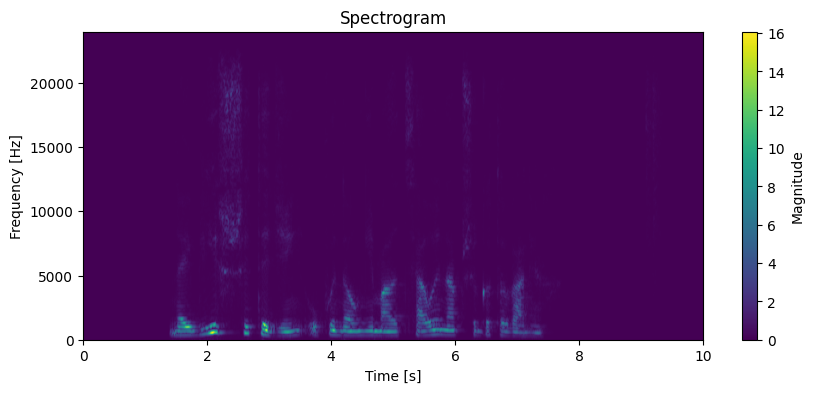

In [151]:
spectrogram = create_spectrogram(wav_example)

print(spectrogram.shape)
spectrogram = tf.squeeze(spectrogram, axis=-1)
print(spectrogram.shape)
# spectrogram_in_db = 20 * tf.math.log(spectrogram + 1e-10) / tf.math.log(10.0)
plt.figure(figsize=(10, 4))
plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis', extent=[0, 10, 0, sample_rate / 2])
plt.colorbar(label='Magnitude')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.show()

# (2499, 257, 1) 2499 - liczba ramek czasowych, 257 - punkty częstotliwościowe dla danej ramki (każdej) + 1 na f = 0, 1 - jednokanalość danych

In [152]:
# spectrogram = create_spectrogram(pitch_a)
# print(spectrogram.shape)
# 
# spectrogram = tf.squeeze(spectrogram, axis=-1)
# print(spectrogram.shape)
# plt.figure(figsize=(10, 4))
# plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis', extent=[0, 10, 0, sample_rate / 2])
# plt.colorbar(label='Magnitude')
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.title('Spectrogram')
# plt.show()

In [153]:
spectrogram_pl_dataset_train = align_pl_dataset_train_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))
spectrogram_pl_dataset_val = align_pl_dataset_val_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))
spectrogram_pl_dataset_test = align_pl_dataset_test_with_processed_samples_norm.map(lambda audio: create_spectrogram(audio))

In [154]:
spectrogram_pl_dataset_train

<_MapDataset element_spec=TensorSpec(shape=(5991, 257, 1), dtype=tf.float32, name=None)>

In [155]:
spectrogram_pl_dataset_val

<_MapDataset element_spec=TensorSpec(shape=(5991, 257, 1), dtype=tf.float32, name=None)>

In [156]:
spectrogram_pl_dataset_test

<_MapDataset element_spec=TensorSpec(shape=<unknown>, dtype=tf.float32, name=None)>

In [157]:
spectrogram_pl_dataset_test.as_numpy_iterator().next().shape

(5991, 257, 1)

In [158]:
labeled_train_dataset = tf.data.Dataset.zip((spectrogram_pl_dataset_train, tf.data.Dataset.from_tensor_slices(tf.ones(len(spectrogram_pl_dataset_train)))))
labeled_val_dataset = tf.data.Dataset.zip((spectrogram_pl_dataset_val, tf.data.Dataset.from_tensor_slices(tf.ones(len(spectrogram_pl_dataset_val)))))
labeled_test_dataset = tf.data.Dataset.zip((spectrogram_pl_dataset_test, tf.data.Dataset.from_tensor_slices(tf.ones(len(spectrogram_pl_dataset_test)))))

In [159]:
labeled_train_dataset.as_numpy_iterator().next()

(array([[[1.6102961e-01],
         [1.3767413e+00],
         [1.6972234e+00],
         ...,
         [2.5779635e-03],
         [2.3084767e-03],
         [1.7871484e-03]],
 
        [[3.9687282e-01],
         [1.0791707e+00],
         [1.7546517e+00],
         ...,
         [2.0486037e-03],
         [1.7593920e-03],
         [3.8044155e-04]],
 
        [[4.2090124e-01],
         [1.0430394e+00],
         [1.9488876e+00],
         ...,
         [1.5188577e-03],
         [1.5761391e-03],
         [8.6587667e-04]],
 
        ...,
 
        [[2.1391127e-01],
         [4.1440710e-01],
         [4.9005103e-01],
         ...,
         [7.3411393e-05],
         [2.5087674e-04],
         [1.9795448e-04]],
 
        [[8.5746996e-02],
         [2.5741404e-01],
         [3.0369604e-01],
         ...,
         [2.7098754e-04],
         [1.4798039e-04],
         [3.0256808e-05]],
 
        [[2.1340014e-01],
         [2.3037885e-01],
         [2.0047496e-01],
         ...,
         [3.5209089e-04],
  

In [160]:
labeled_val_dataset.as_numpy_iterator().next()

(array([[[1.37876749e-01],
         [2.00402346e-02],
         [6.80927634e-01],
         ...,
         [6.67214554e-05],
         [7.14244961e-05],
         [5.50746918e-05]],
 
        [[2.46918909e-02],
         [1.20690957e-01],
         [7.29144096e-01],
         ...,
         [3.66824825e-05],
         [3.55997945e-05],
         [7.48410821e-06]],
 
        [[4.61639091e-02],
         [1.72154486e-01],
         [7.42328465e-01],
         ...,
         [2.07657831e-05],
         [2.58055370e-05],
         [2.23368406e-05]],
 
        ...,
 
        [[8.24453658e-04],
         [7.39304721e-02],
         [9.54088345e-02],
         ...,
         [1.35245398e-04],
         [2.26509990e-04],
         [2.58266111e-04]],
 
        [[4.80341054e-02],
         [7.98390433e-02],
         [1.08579271e-01],
         ...,
         [1.39685289e-04],
         [1.89521859e-04],
         [2.07569450e-04]],
 
        [[7.41686076e-02],
         [8.77853036e-02],
         [1.09632105e-01],
         

In [161]:
labeled_test_dataset.as_numpy_iterator().next()

(array([[[3.74013209e+00],
         [5.39764023e+00],
         [7.43858767e+00],
         ...,
         [1.45675120e-04],
         [1.52246183e-04],
         [9.08374786e-05]],
 
        [[1.64014459e+00],
         [5.23130941e+00],
         [8.40193558e+00],
         ...,
         [1.85948913e-04],
         [1.81830284e-04],
         [1.74582005e-04]],
 
        [[1.28266299e+00],
         [5.08394098e+00],
         [8.63815594e+00],
         ...,
         [1.30503249e-04],
         [2.20755741e-04],
         [2.80737877e-04]],
 
        ...,
 
        [[2.83574928e-02],
         [2.86699403e-02],
         [2.79197227e-02],
         ...,
         [3.62112361e-04],
         [4.49973915e-04],
         [5.03895804e-04]],
 
        [[2.96067558e-02],
         [2.59775613e-02],
         [2.21861526e-02],
         ...,
         [4.18557058e-04],
         [5.62685076e-04],
         [6.26758672e-04]],
 
        [[2.74669454e-02],
         [1.94717217e-02],
         [1.16810845e-02],
         